In [37]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast

#Loading data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Clean Up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [38]:
df_EGY = df[df['job_country'] == 'Egypt']

In [39]:
df_skills = df_EGY.explode('job_skills')


In [40]:

df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count


,job_skills,job_title_short,skill_count
586,python,Data Engineer,270
753,sql,Data Engineer,251
587,python,Data Scientist,239
752,sql,Data Analyst,199
754,sql,Data Scientist,185
...,...,...,...
4,airflow,Machine Learning Engineer,1
896,yarn,Software Engineer,1
897,zoom,Business Analyst,1
898,zoom,Data Engineer,1


In [41]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

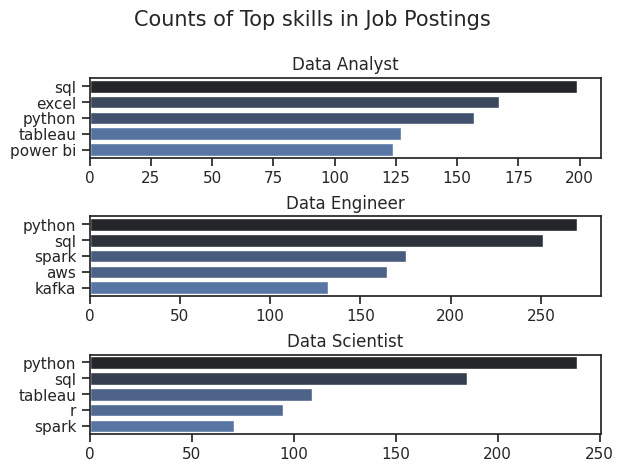

In [88]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    
fig.suptitle('Counts of Top skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) #Fixes the overlap
plt.show()
   

In [46]:
df_job_title_count = df_EGY['job_title_short'].value_counts().reset_index(name='jobs_total')

In [ ]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_percent['skill_percent'] = 100 * df_skills_percent['skill_count'] / df_skills_percent['jobs_total']


,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Engineer,270,494,54.655870
1,sql,Data Engineer,251,494,50.809717
2,python,Data Scientist,239,512,46.679688
3,sql,Data Analyst,199,529,37.618147
4,sql,Data Scientist,185,512,36.132812
...,...,...,...,...,...
895,airflow,Machine Learning Engineer,1,107,0.934579
896,yarn,Software Engineer,1,286,0.349650
897,zoom,Business Analyst,1,325,0.307692
898,zoom,Data Engineer,1,494,0.202429


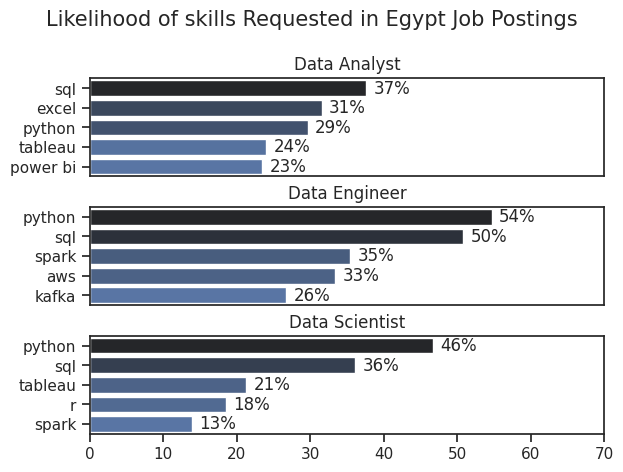

In [75]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 70)
    
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{int(v)}%', va='center')
    
    if i != len(job_titles) - 1:    
     ax[i].set_xticks([])
    
fig.suptitle('Likelihood of skills Requested in Egypt Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) #Fixes the overlap
plt.show()
   